In [2]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
with open('../data/camosun_programs_new.json') as f:
    data = json.load(f)

In [5]:
len(data)

126

In [6]:
# Convert list of json objects to pandas DataFrame
df = pd.DataFrame(data)
df.head()

,url,title,intro_text,overview,credential,work_experience,study_options,open_to_international,area_of_study,length,program_outline_url,curriculum,tuition_info,admission_requirements,contact_info
0,https://camosun.ca/programs-courses/find-progr...,"Academic Upgrading, Certificate",Start small but dream Big! We offer programs f...,A supportive learning community\n Learn i...,Certificate,None,Full-time,Yes,Upgrading & Preparatory,4 months,https://camosun.ca/academic-calendar-program-l...,"[ENGL 033 - Fundamental English 6 Credits: 0, ...",Tuition and fees\n Effective from Septemb...,Admission requirements\n Fundamental Upg...,{}
1,https://camosun.ca/programs-courses/find-progr...,"Accounting and Finance, Advanced Certificate",Start your career in accounting. Take courses ...,Skills that employers value in this competitiv...,Advanced Certificate,Co-op / internship,Full-time,Yes,Business,2 years full-time,https://camosun.ca/academic-calendar-program-l...,"[ACCT 110 - Financial Accounting 1 Credits: 3,...",Tuition and fees\n Effective from Septemb...,Admission requirements\n One of:C in Engl...,{}
2,https://camosun.ca/programs-courses/find-progr...,"Adventure Education, Post-Degree Diploma",Develop your understanding of adventure educat...,"Explore the potential of outdoor, experiential...",Post-Degree Diploma,None,Part-time,Yes,Health Sciences,13 months,https://camosun.ca/academic-calendar-program-l...,[ADED 501 - Adventures in Group Work Credits: ...,Tuition and fees\n Effective from Septemb...,Admission requirements\n All of:Proof of ...,{}
3,https://camosun.ca/programs-courses/find-progr...,"Applied Chemistry and Biotechnology, Diploma",Discover all that you can do with science. Thi...,"Inspired by science?\n Creative, meticulo...",Diploma,Co-op / internship,Full-time,Yes,Natural Sciences,2 years,https://camosun.ca/academic-calendar-program-l...,[BIOL 126 - Physiological Basis of Life Credit...,Tuition and fees\n Effective from Septemb...,Admission requirements\n One of:C+ in En...,{}
4,https://camosun.ca/programs-courses/find-progr...,"Applied Tourism & Hospitality Management, Post...",Camosun graduates make a difference - locally ...,Advance your skills in the global tourism and ...,Post-Degree Diploma,Co-op / internship,Full-time,Yes,Business,16 months to 2 years,https://camosun.ca/academic-calendar-program-l...,"[ACCT 161 - Financial Management Credits: 3, B...",Tuition and fees\n Effective from Septemb...,Admission requirements\n One of:C+ in Eng...,{}


In [11]:
programs_per_credential = df.groupby('credential')['title'].count().sort_values(ascending=False)
programs_per_credential

credential
Certificate                         53
Diploma                             29
Post-Degree Diploma                  9
Degree                               8
Associate Degree                     7
Advanced Diploma                     6
Advanced Certificate                 5
Technical Training Certification     5
No credential                        3
Certificate of Completion            1
Name: title, dtype: int64

Text(0.5, 1.0, 'Number of Programs per Credential')

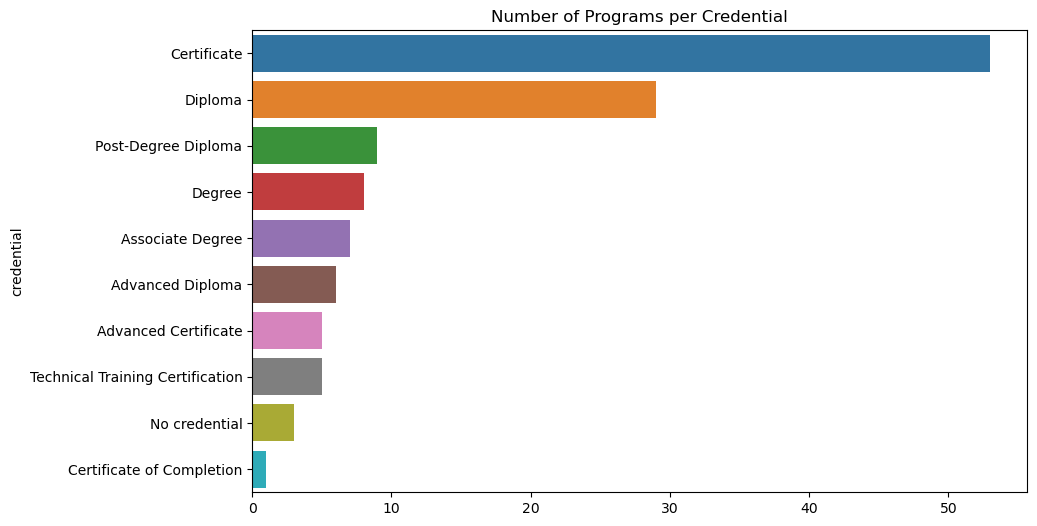

In [14]:
# plot a bar chart of programs per credential
plt.figure(figsize=(10, 6))
sns.barplot(y=programs_per_credential.index, x=programs_per_credential.values)
plt.title('Number of Programs per Credential')

In [41]:
# Calculate the number of programs per discipline
programs_per_discipline = df.groupby('area_of_study')['title'].count().sort_values(ascending=False)
programs_per_discipline

area_of_study
Business                      25
Technologies & Engineering    24
Health Sciences               18
Arts & Humanities             16
Trades Foundation             12
Upgrading & Preparatory        9
Human Services                 6
Trades Apprenticeship          6
Indigenous Education           4
Natural Sciences               4
                               1
University Transfer            1
Name: title, dtype: int64

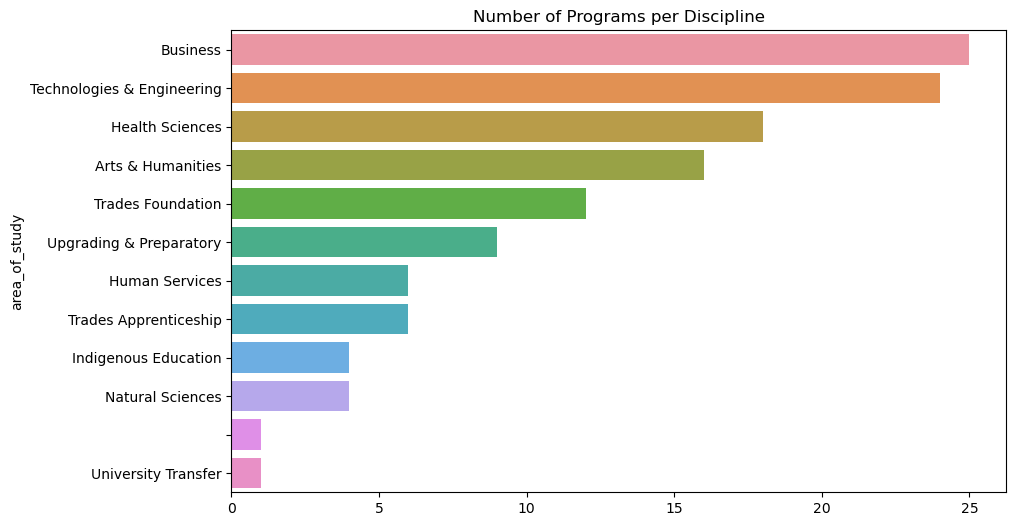

In [42]:
# Plot a bar chart of programs per discipline
plt.figure(figsize=(10, 6))
sns.barplot(y=programs_per_discipline.index, x=programs_per_discipline.values)
plt.title('Number of Programs per Discipline')
plt.show()

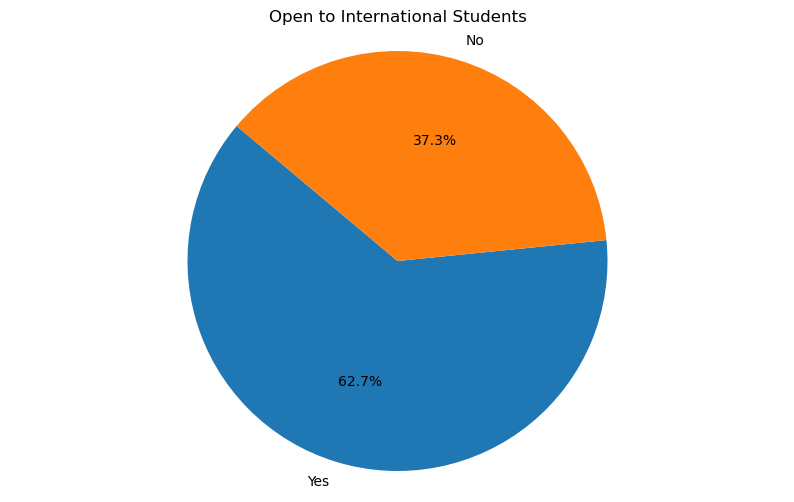

In [44]:
# Plot a donutchart of open_to_international
open_to_international = df['open_to_international'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(open_to_international, labels=open_to_international.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Open to International Students')
plt.show()

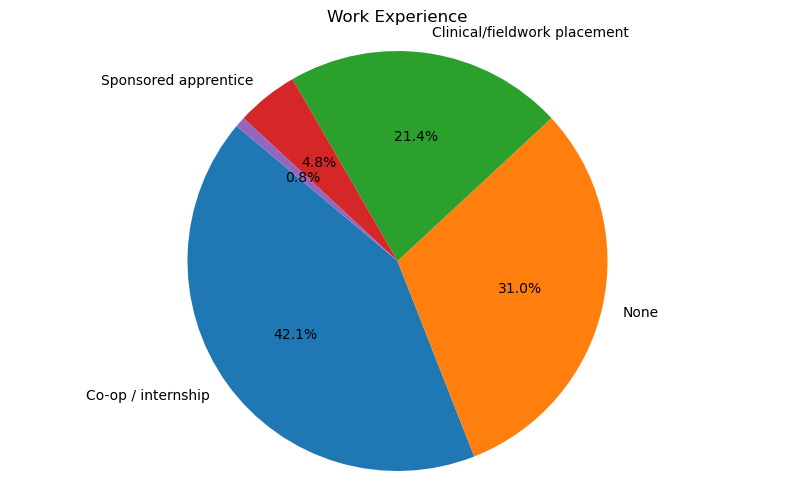

In [47]:
# Plot a donutchart of work_experience
work_experience = df['work_experience'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(work_experience, labels=work_experience.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Work Experience')
plt.show()

<Figure size 1000x600 with 0 Axes>

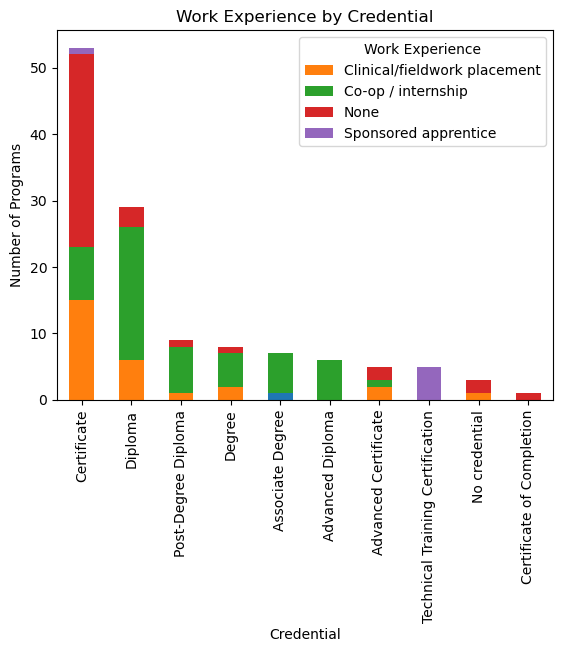

In [55]:
# obtain work_experiences by credential
work_experience_by_credential = df.groupby('credential')['work_experience'].value_counts().unstack()
work_experience_by_credential = work_experience_by_credential.fillna(0)
work_experience_by_credential = work_experience_by_credential.astype(int)
work_experience_by_credential['Total'] = work_experience_by_credential.sum(axis=1)
work_experience_by_credential = work_experience_by_credential.sort_values(by='Total', ascending=False)

# Plot a stacked bar chart of work_experience by credential
plt.figure(figsize=(10, 6))
work_experience_by_credential.iloc[:, :-1].plot(kind='bar', stacked=True)
plt.title('Work Experience by Credential')
plt.xlabel('Credential')
plt.ylabel('Number of Programs')
plt.legend(title='Work Experience')
plt.show()